In [1]:
!pip install -q datasets

In [2]:
!ls

__notebook_source__.ipynb


In [4]:
from pathlib import Path
path = Path('/kaggle/input/us-patent-phrase-to-phrase-matching')

In [5]:
path

PosixPath('/kaggle/input/us-patent-phrase-to-phrase-matching')

In [6]:
!ls {path}

sample_submission.csv  test.csv  train.csv


In [7]:
import pandas as pd

pd.read_csv(path/'sample_submission.csv')

,id,score
0,4112d61851461f60,0
1,09e418c93a776564,0
2,36baf228038e314b,0
3,1f37ead645e7f0c8,0
4,71a5b6ad068d531f,0
5,474c874d0c07bd21,0
6,442c114ed5c4e3c9,0
7,b8ae62ea5e1d8bdb,0
8,faaddaf8fcba8a3f,0
9,ae0262c02566d2ce,0


In [8]:
train_df = pd.read_csv(path/'train.csv')
train_df.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [9]:
train_df.shape

(36473, 5)

In [11]:
train_df.describe(include = 'object')

,id,anchor,target,context
count,36473,36473,36473,36473
unique,36473,733,29340,106
top,37d61fd2272659b1,component composite coating,composition,H01
freq,1,152,24,2186


In [12]:
train_df['input'] = 'TEXT1: ' + train_df.context + '; TEXT2: ' + train_df.target + '; ANC1: ' + train_df.anchor

In [15]:
train_df.input.sample(10)

147      TEXT1: C08; TEXT2: mechanical characteristics;...
18229    TEXT1: A01; TEXT2: moving an element; ANC1: li...
1038     TEXT1: B60; TEXT2: air pressure of the lungs; ...
29939    TEXT1: G03; TEXT2: sensitive recording; ANC1: ...
29278    TEXT1: G03; TEXT2: annular seal members; ANC1:...
21044    TEXT1: A61; TEXT2: neural communication; ANC1:...
32915      TEXT1: C09; TEXT2: hydrocarbon; ANC1: tetracene
22845    TEXT1: F16; TEXT2: opening; ANC1: overflow com...
10384     TEXT1: F16; TEXT2: shaft gear; ANC1: dual clutch
248      TEXT1: H04; TEXT2: achieve goal; ANC1: achieve...
Name: input, dtype: object

In [16]:
from datasets import Dataset, DatasetDict

In [17]:
train_ds = Dataset.from_pandas(train_df)
train_ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input'],
    num_rows: 36473
})

In [20]:
train_ds['input'][:10]

['TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement',
 'TEXT1: A47; TEXT2: act of abating; ANC1: abatement',
 'TEXT1: A47; TEXT2: active catalyst; ANC1: abatement',
 'TEXT1: A47; TEXT2: eliminating process; ANC1: abatement',
 'TEXT1: A47; TEXT2: forest region; ANC1: abatement',
 'TEXT1: A47; TEXT2: greenhouse gases; ANC1: abatement',
 'TEXT1: A47; TEXT2: increased rate; ANC1: abatement',
 'TEXT1: A47; TEXT2: measurement level; ANC1: abatement',
 'TEXT1: A47; TEXT2: minimising sounds; ANC1: abatement',
 'TEXT1: A47; TEXT2: mixing core materials; ANC1: abatement']

In [21]:
model_nm = 'microsoft/deberta-v3-small'

In [22]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [23]:
tokz = AutoTokenizer.from_pretrained(model_nm)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [24]:
tokz

DebertaV2TokenizerFast(name_or_path='microsoft/deberta-v3-small', vocab_size=128000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [25]:
tokz.tokenize('I am Sonali. Nice to meet you')

['▁I', '▁am', '▁Sonali', '.', '▁Nice', '▁to', '▁meet', '▁you']

In [61]:
train_ds[0]

{'id': '37d61fd2272659b1',
 'anchor': 'abatement',
 'target': 'abatement of pollution',
 'context': 'A47',
 'score': 0.5,
 'input': 'TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement'}

In [62]:
tokz('TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement')

{'input_ids': [1, 54453, 435, 294, 336, 5753, 346, 54453, 445, 294, 47284, 265, 6435, 346, 23702, 435, 294, 47284, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [63]:
tokz('I am Sonali [SEP] Nice to meet you')

{'input_ids': [1, 273, 481, 120770, 2, 5630, 264, 957, 274, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [64]:
def tok_func(x): return tokz(x['input'])

In [65]:
tok_func(train_ds[0])

{'input_ids': [1, 54453, 435, 294, 336, 5753, 346, 54453, 445, 294, 47284, 265, 6435, 346, 23702, 435, 294, 47284, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [66]:
tok_train_ds = train_ds.map(tok_func, batched = True)

  0%|          | 0/37 [00:00<?, ?ba/s]

In [67]:
tok_train_ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36473
})

In [68]:
tok_train_ds[0]

{'id': '37d61fd2272659b1',
 'anchor': 'abatement',
 'target': 'abatement of pollution',
 'context': 'A47',
 'score': 0.5,
 'input': 'TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement',
 'input_ids': [1,
  54453,
  435,
  294,
  336,
  5753,
  346,
  54453,
  445,
  294,
  47284,
  265,
  6435,
  346,
  23702,
  435,
  294,
  47284,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [69]:
tokz.vocab['of']

1580

In [70]:
tok_train_ds = tok_train_ds.rename_columns({'score': 'labels'})

In [71]:
tok_train_ds[0]

{'id': '37d61fd2272659b1',
 'anchor': 'abatement',
 'target': 'abatement of pollution',
 'context': 'A47',
 'labels': 0.5,
 'input': 'TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement',
 'input_ids': [1,
  54453,
  435,
  294,
  336,
  5753,
  346,
  54453,
  445,
  294,
  47284,
  265,
  6435,
  346,
  23702,
  435,
  294,
  47284,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [72]:
test_df = pd.read_csv(path/'test.csv')

In [73]:
test_df.head()

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04


In [74]:
final_ds = tok_train_ds.train_test_split(0.25, seed = 42)

In [75]:
final_ds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9119
    })
})

In [ ]:
test_df['input'] = 

In [81]:
test_df['input'] = 'TEXT1: ' + test_df.context + '; TEXT2: ' + test_df.target + '; ANC1: ' + test_df.anchor

In [82]:
test_df.head()

,id,anchor,target,context,input
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02,TEXT1: G02; TEXT2: inorganic photoconductor dr...
1,09e418c93a776564,adjust gas flow,altering gas flow,F23,TEXT1: F23; TEXT2: altering gas flow; ANC1: ad...
2,36baf228038e314b,lower trunnion,lower locating,B60,TEXT1: B60; TEXT2: lower locating; ANC1: lower...
3,1f37ead645e7f0c8,cap component,upper portion,D06,TEXT1: D06; TEXT2: upper portion; ANC1: cap co...
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04,TEXT1: H04; TEXT2: artificial neural network; ...


In [84]:
test_ds = Dataset.from_pandas(test_df)
test_ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'input'],
    num_rows: 36
})

In [85]:
tok_test_ds = test_ds.map(tok_func, batched = True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [86]:
tok_test_ds[0]

{'id': '4112d61851461f60',
 'anchor': 'opc drum',
 'target': 'inorganic photoconductor drum',
 'context': 'G02',
 'input': 'TEXT1: G02; TEXT2: inorganic photoconductor drum; ANC1: opc drum',
 'input_ids': [1,
  54453,
  435,
  294,
  1098,
  4159,
  346,
  54453,
  445,
  294,
  31553,
  1456,
  48133,
  8263,
  346,
  23702,
  435,
  294,
  8847,
  1207,
  8263,
  2],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [88]:
import numpy as np

In [103]:
def corr(x): return {'pearson': np.corrcoef(*x)[0][1]}

In [93]:
from transformers import TrainingArguments, Trainer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [94]:
bs = 128
epoch = 4
lr = 8e-5

In [106]:
args = TrainingArguments(
    'outputs', 
    learning_rate = lr, 
    warmup_ratio = 0.1, 
    lr_scheduler_type = 'cosine', 
    fp16 = True, 
    evaluation_strategy = 'epoch', 
    per_device_train_batch_size = bs, 
    per_device_eval_batch_size = 2 * bs, 
    num_train_epochs = epoch, 
    weight_decay = 0.01, 
    report_to = 'none'
)

In [107]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels = 1)

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.classifier.weight', 'mask_predictions.dense.weight', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

In [108]:
trainer = Trainer(
    model, 
    args, 
    train_dataset = final_ds['train'],
    eval_dataset = final_ds['test'],
    tokenizer = tokz,
    compute_metrics = corr
)

In [109]:
trainer.train()

Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.028372,0.800389
2,No log,0.023541,0.824878
3,0.030000,0.023672,0.833279
4,0.030000,0.021848,0.835544


TrainOutput(global_step=856, training_loss=0.022989866332473043, metrics={'train_runtime': 272.6939, 'train_samples_per_second': 401.241, 'train_steps_per_second': 3.139, 'total_flos': 716605488222960.0, 'train_loss': 0.022989866332473043, 'epoch': 4.0})

In [124]:
preds = trainer.predict(tok_test_ds).predictions.astype('float').flatten()
preds

array([ 0.44433594,  0.62109375,  0.61523438,  0.33496094, -0.02429199,
        0.53173828,  0.47802734,  0.03237915,  0.18615723,  1.09179688,
        0.265625  ,  0.27685547,  0.7421875 ,  0.90478516,  0.73974609,
        0.50292969,  0.31542969, -0.00231361,  0.66015625,  0.35571289,
        0.4440918 ,  0.23205566,  0.20703125,  0.25415039,  0.59472656,
       -0.02549744, -0.02813721, -0.02986145, -0.02383423,  0.59179688,
        0.31713867, -0.00125694,  0.71240234,  0.48583984,  0.47802734,
        0.24755859])

In [125]:
preds = np.clip(preds, 0, 1)

In [126]:
preds

array([0.44433594, 0.62109375, 0.61523438, 0.33496094, 0.        ,
       0.53173828, 0.47802734, 0.03237915, 0.18615723, 1.        ,
       0.265625  , 0.27685547, 0.7421875 , 0.90478516, 0.73974609,
       0.50292969, 0.31542969, 0.        , 0.66015625, 0.35571289,
       0.4440918 , 0.23205566, 0.20703125, 0.25415039, 0.59472656,
       0.        , 0.        , 0.        , 0.        , 0.59179688,
       0.31713867, 0.        , 0.71240234, 0.48583984, 0.47802734,
       0.24755859])

In [127]:
submission = Dataset.from_dict({
    'id': test_ds['id'],
    'score': preds
})

In [128]:
submission

Dataset({
    features: ['id', 'score'],
    num_rows: 36
})

In [129]:
submission.to_csv('submission.csv', index = False)

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

1030

In [130]:
df = pd.read_csv('/kaggle/working/submission.csv')
df

,id,score
0,4112d61851461f60,0.444336
1,09e418c93a776564,0.621094
2,36baf228038e314b,0.615234
3,1f37ead645e7f0c8,0.334961
4,71a5b6ad068d531f,0.000000
5,474c874d0c07bd21,0.531738
6,442c114ed5c4e3c9,0.478027
7,b8ae62ea5e1d8bdb,0.032379
8,faaddaf8fcba8a3f,0.186157
9,ae0262c02566d2ce,1.000000


In [123]:
pd.read_csv('/kaggle/input/us-patent-phrase-to-phrase-matching/sample_submission.csv')

,id,score
0,4112d61851461f60,0
1,09e418c93a776564,0
2,36baf228038e314b,0
3,1f37ead645e7f0c8,0
4,71a5b6ad068d531f,0
5,474c874d0c07bd21,0
6,442c114ed5c4e3c9,0
7,b8ae62ea5e1d8bdb,0
8,faaddaf8fcba8a3f,0
9,ae0262c02566d2ce,0


**Advance Level**

In [1]:
!pip install -q datasets
!pip install -Uqq fastbook

In [3]:
from fastbook import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
path = Path('/kaggle/input/us-patent-phrase-to-phrase-matching')

In [5]:
list(path.glob('*'))

[Path('/kaggle/input/us-patent-phrase-to-phrase-matching/sample_submission.csv'),
 Path('/kaggle/input/us-patent-phrase-to-phrase-matching/train.csv'),
 Path('/kaggle/input/us-patent-phrase-to-phrase-matching/test.csv')]

In [6]:
df = pd.read_csv(path/'train.csv')
df.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [8]:
df.anchor.value_counts()

component composite coating              152
sheet supply roller                      150
source voltage                           140
perfluoroalkyl group                     136
el display                               135
                                        ... 
plug nozzle                                2
shannon                                    2
dry coating composition1                   2
peripheral nervous system stimulation      1
conduct conducting material                1
Name: anchor, Length: 733, dtype: int64

In [9]:
df.target.value_counts()

composition                    24
data                           22
metal                          22
motor                          22
assembly                       21
                               ..
switching switch over valve     1
switching switch off valve      1
switching over valve            1
switching off valve             1
wooden substrate                1
Name: target, Length: 29340, dtype: int64

In [10]:
df.context.value_counts()

H01    2186
H04    2177
G01    1812
A61    1477
F16    1091
       ... 
B03      47
F17      33
B31      24
A62      23
F26      18
Name: context, Length: 106, dtype: int64

In [16]:
df.context.str[0]

0        A
1        A
2        A
3        A
4        A
        ..
36468    B
36469    B
36470    B
36471    B
36472    B
Name: context, Length: 36473, dtype: object

In [17]:
df['section'] = df.context.str[0]

In [18]:
df.head()

,id,anchor,target,context,score,section
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,A
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,A
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,A
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,A
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A


In [19]:
df[df.score == 1]

,id,anchor,target,context,score,section
28,473137168ebf7484,abatement,abating,F24,1.0,F
158,621b048d70aa8867,absorbent properties,absorbent characteristics,D01,1.0,D
161,bc20a1c961cb073a,absorbent properties,absorption properties,D01,1.0,D
311,e955700dffd68624,acid absorption,absorption of acid,B08,1.0,B
315,3a09aba546aac675,acid absorption,acid absorption,B08,1.0,B
...,...,...,...,...,...,...
36398,913141526432f1d6,wiring trough,wiring troughs,F16,1.0,F
36435,ee0746f2a8ecef97,wood article,wood articles,B05,1.0,B
36440,ecaf479135cf0dfd,wood article,wooden article,B05,1.0,B
36464,8ceaa2b5c2d56250,wood article,wood article,B44,1.0,B


<Axes: >

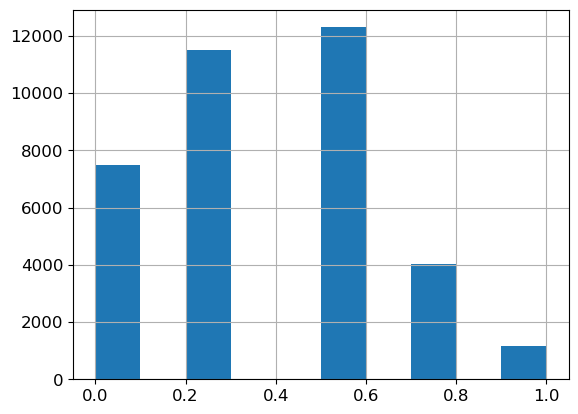

In [20]:
df.score.hist()

In [21]:
model_nm = 'microsoft/deberta-v3-small'

In [22]:
from datasets import Dataset, DatasetDict

In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification 

In [24]:
tokz = AutoTokenizer.from_pretrained(model_nm)
tokz

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


DebertaV2TokenizerFast(name_or_path='microsoft/deberta-v3-small', vocab_size=128000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [26]:
tokz('sonali behera')

{'input_ids': [1, 1441, 13191, 282, 62521, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [27]:
tokz.tokenize('sonali behera')

['▁son', 'ali', '▁be', 'hera']

In [28]:
tokz.tokenize('Sonali Behera')

['▁Sonali', '▁Be', 'hera']

In [29]:
tokz.all_special_tokens

['[CLS]', '[SEP]', '[UNK]', '[PAD]', '[MASK]']

In [30]:
tokz.sep_token

'[SEP]'

In [31]:
sep = tokz.sep_token

In [32]:
df.columns

Index(['id', 'anchor', 'target', 'context', 'score', 'section'], dtype='object')

In [40]:
df['inputs'] = df.context + sep + df.anchor + sep + df.target

In [41]:
df.head()

,id,anchor,target,context,score,section,inputs
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,A,A47[SEP]abatement[SEP]abatement of pollution
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,A,A47[SEP]abatement[SEP]act of abating
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,A,A47[SEP]abatement[SEP]active catalyst
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,A,A47[SEP]abatement[SEP]eliminating process
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,A47[SEP]abatement[SEP]forest region


In [42]:
def tok_func(x): return tokz(x['inputs'])

In [44]:
ds_train = Dataset.from_pandas(df)

In [46]:
ds_train = ds_train.rename_column('score', 'label')

In [47]:
ds_train[0]

{'id': '37d61fd2272659b1',
 'anchor': 'abatement',
 'target': 'abatement of pollution',
 'context': 'A47',
 'label': 0.5,
 'section': 'A',
 'inputs': 'A47[SEP]abatement[SEP]abatement of pollution'}

In [79]:
ds_train_tok = ds_train.map(tok_func, batched = True, remove_columns = ['id', 'anchor', 'target', 'context', 'section', 'inputs'])
ds_train_tok[0]

  0%|          | 0/37 [00:00<?, ?ba/s]

{'label': 0.5,
 'input_ids': [1, 336, 5753, 2, 47284, 2, 47284, 265, 6435, 2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [80]:
ds_train_tok

Dataset({
    features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36473
})

In [56]:
anchors = list(df.anchor.unique())
anchors[:5]

['abatement',
 'abnormal position',
 'absorbent properties',
 'acan',
 'accept information']

In [57]:
np.random.seed(42)
np.random.shuffle(anchors)
anchors[:5]

['time digital signal',
 'antiatherosclerotic',
 'filled interior',
 'dispersed powder',
 'locking formation']

In [58]:
val_prop = 0.25
val_len = int(len(anchors) * val_prop)
val_anchors = anchors[:val_len]

In [77]:
is_val = np.isin(df.anchor, val_anchors)
idxs = np.arange(len(df))
val_idxs = idxs[is_val]
train_idxs = idxs[~is_val]

In [78]:
len(val_idxs), len(train_idxs)

(9116, 27357)

In [81]:
final_ds = DatasetDict({
    'train': ds_train_tok.select(train_idxs),
    'test': ds_train_tok.select(val_idxs)
})

In [82]:
final_ds

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27357
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9116
    })
})

In [98]:
df.score.iloc[train_idxs].mean(), df.score.iloc[val_idxs].mean()

(0.3623021530138539, 0.3613426941641071)

In [108]:
def corr(x): return {'pearson': np.corrcoef(*x)[0][1]}

In [102]:
epoch = 4 
lr = 8e-5
bs = 128
wd = 0.01

In [104]:
from transformers import Trainer, TrainingArguments

In [106]:
args = TrainingArguments(
    'outputs',
    evaluation_strategy = 'epoch',
    per_device_train_batch_size = bs,
    per_device_eval_batch_size = 2 * bs,
    learning_rate = lr,
    weight_decay = wd,
    num_train_epochs = epoch,
    lr_scheduler_type = 'cosine',
    warmup_ratio = 0.1,
    fp16 = True,
    report_to = 'none'
)

In [107]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels = 1)

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

In [110]:
trainer = Trainer(
    model, 
    args, 
    train_dataset = final_ds['train'], 
    eval_dataset = final_ds['test'], 
    tokenizer = tokz, 
    compute_metrics = corr
)

In [111]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DebertaV2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.034283,0.795241
2,No log,0.024617,0.810773
3,0.036900,0.024415,0.816214
4,0.036900,0.024710,0.816041


TrainOutput(global_step=856, training_loss=0.027175398630516552, metrics={'train_runtime': 234.572, 'train_samples_per_second': 466.501, 'train_steps_per_second': 3.649, 'total_flos': 469191313065600.0, 'train_loss': 0.027175398630516552, 'epoch': 4.0})

In [112]:
df.columns

Index(['id', 'anchor', 'target', 'context', 'score', 'section', 'inputs'], dtype='object')

In [113]:
def get_final_ds(df):
    ds = Dataset.from_pandas(df).rename_column('score', 'label')
    ds = ds.map(tok_func, batched = True, remove_columns = ['id', 'anchor', 'target', 'context', 'section', 'inputs'])
    return DatasetDict({
        'train': ds.select(train_idxs),
        'test': ds.select(val_idxs)
    })                          

In [116]:
get_final_ds(df)

  0%|          | 0/37 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27357
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9116
    })
})

In [117]:
def get_model():
    return AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels = 1)

**dds are the final_ds**

In [119]:
def get_trainer(dds, model = None):
    if model is None: model = get_model()
    args = TrainingArguments(
        'outputs',
        evaluation_strategy = 'epoch',
        per_device_train_batch_size = bs,
        per_device_eval_batch_size = 2 * bs,
        learning_rate = lr,
        weight_decay = wd,
        num_train_epochs = epoch,
        lr_scheduler_type = 'cosine',
        warmup_ratio = 0.1,
        fp16 = True,
        report_to = 'none'
    )
    return Trainer(
        model, 
        args, 
        train_dataset = dds['train'], 
        eval_dataset = dds['test'], 
        tokenizer = tokz, 
        compute_metrics = corr
    )

In [120]:
sep = ' [s] '
df['inputs'] = df.context + sep + df.anchor + sep + df.target
dds = get_final_ds(df)

  0%|          | 0/37 [00:00<?, ?ba/s]

In [121]:
get_trainer(dds).train()

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.025018,0.798577
2,No log,0.026342,0.814696
3,0.031500,0.023176,0.820895
4,0.031500,0.024261,0.819900


TrainOutput(global_step=856, training_loss=0.02371560914494167, metrics={'train_runtime': 245.4181, 'train_samples_per_second': 445.884, 'train_steps_per_second': 3.488, 'total_flos': 582440534448480.0, 'train_loss': 0.02371560914494167, 'epoch': 4.0})

In [124]:
df['inputs'] = df.inputs.str.lower()
dds = get_final_ds(df)
get_trainer(dds).train()

  0%|          | 0/37 [00:00<?, ?ba/s]

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.024556,0.799240
2,No log,0.025780,0.813956
3,0.031400,0.022919,0.820981
4,0.031400,0.024270,0.819902


TrainOutput(global_step=856, training_loss=0.02366692774763731, metrics={'train_runtime': 245.1243, 'train_samples_per_second': 446.418, 'train_steps_per_second': 3.492, 'total_flos': 582440534448480.0, 'train_loss': 0.02366692774763731, 'epoch': 4.0})

In [125]:
df['sectok'] = '[' + df.section + ']'
df.head()

,id,anchor,target,context,score,section,inputs,sectok
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,A,a47 [s] abatement [s] abatement of pollution,[A]
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,A,a47 [s] abatement [s] act of abating,[A]
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,A,a47 [s] abatement [s] active catalyst,[A]
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,A,a47 [s] abatement [s] eliminating process,[A]
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,a47 [s] abatement [s] forest region,[A]


In [130]:
sectoks = list(df.sectok.unique())

In [131]:
tokz.add_special_tokens({'additional_special_tokens': sectoks})

8

In [137]:
df.columns

Index(['id', 'anchor', 'target', 'context', 'score', 'section', 'inputs',
       'sectok'],
      dtype='object')

In [138]:
df['inputs'] = df.sectok + sep + df.context + sep + df.anchor.str.lower() + sep + df.target
df.head()

,id,anchor,target,context,score,section,inputs,sectok
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,A,[A] [s] A47 [s] abatement [s] abatement of pollution,[A]
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,A,[A] [s] A47 [s] abatement [s] act of abating,[A]
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,A,[A] [s] A47 [s] abatement [s] active catalyst,[A]
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,A,[A] [s] A47 [s] abatement [s] eliminating process,[A]
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,[A] [s] A47 [s] abatement [s] forest region,[A]


In [139]:
len(tokz)

128009

In [140]:
dds = get_final_ds(df)
model = get_model()
model.resize_token_embeddings(len(tokz))

  0%|          | 0/37 [00:00<?, ?ba/s]

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

Embedding(128009, 768)

In [141]:
get_trainer(dds, model).train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.024678,0.798919
2,No log,0.025233,0.817906
3,0.031600,0.023281,0.823071
4,0.031600,0.023457,0.824673


TrainOutput(global_step=856, training_loss=0.023694139774714674, metrics={'train_runtime': 266.4202, 'train_samples_per_second': 410.735, 'train_steps_per_second': 3.213, 'total_flos': 695689755831360.0, 'train_loss': 0.023694139774714674, 'epoch': 4.0})

In [142]:
n_folds = 4

In [143]:
from sklearn.model_selection import StratifiedGroupKFold

In [153]:
df = df.sample(frac = 1, random_state = 42)

In [154]:
df.head()

,id,anchor,target,context,score,section,inputs,sectok
33511,ed1c4e525eb105fe,transmit alarm,display indicator,G08,0.00,G,[G] [s] G08 [s] transmit alarm [s] display indicator,[G]
18670,5386316f318f5221,locking formation,retaining element,B60,0.25,B,[B] [s] B60 [s] locking formation [s] retaining element,[B]
18049,1544ca6753fcbddd,lateral power,transducer,H01,0.25,H,[H] [s] H01 [s] lateral power [s] transducer,[H]
31660,f9d8979b94cec923,spreader body,spreader,A01,0.75,A,[A] [s] A01 [s] spreader body [s] spreader,[A]
15573,e151ca5ea5cc0f08,high gradient magnetic separators,magnetic filtration,B03,0.50,B,[B] [s] B03 [s] high gradient magnetic separators [s] magnetic filtration,[B]


In [155]:
cv = StratifiedGroupKFold(n_folds)
scores = (df.score * 100).astype(int)
scores

33511     0
18670    25
18049    25
31660    75
15573    50
         ..
16850    75
6265      0
11284    50
860      50
15795    25
Name: score, Length: 36473, dtype: int64

In [156]:
idxs

array([    0,     1,     2, ..., 36470, 36471, 36472])

In [158]:
folds = list(cv.split(idxs, scores, df.anchor))

In [160]:
df.columns

Index(['id', 'anchor', 'target', 'context', 'score', 'section', 'inputs',
       'sectok'],
      dtype='object')

In [166]:
tok_ds = Dataset.from_pandas(df).rename_column('score', 'label')
tok_ds = tok_ds.map(tok_func, batched = True, remove_columns = ['id', 'anchor', 'target', 'context', 'section', 'inputs', 'sectok', '__index_level_0__'])

  0%|          | 0/37 [00:00<?, ?ba/s]

In [172]:
len(folds[0][1])

9127

In [167]:
tok_ds

Dataset({
    features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36473
})

In [174]:
def get_fold(folds, fold_num):
    train, val = folds[fold_num]
    return DatasetDict({
        'train': tok_ds.select(train), 
        'test': tok_ds.select(val)
    })

In [176]:
df.head()

,id,anchor,target,context,score,section,inputs,sectok
33511,ed1c4e525eb105fe,transmit alarm,display indicator,G08,0.00,G,[G] [s] G08 [s] transmit alarm [s] display indicator,[G]
18670,5386316f318f5221,locking formation,retaining element,B60,0.25,B,[B] [s] B60 [s] locking formation [s] retaining element,[B]
18049,1544ca6753fcbddd,lateral power,transducer,H01,0.25,H,[H] [s] H01 [s] lateral power [s] transducer,[H]
31660,f9d8979b94cec923,spreader body,spreader,A01,0.75,A,[A] [s] A01 [s] spreader body [s] spreader,[A]
15573,e151ca5ea5cc0f08,high gradient magnetic separators,magnetic filtration,B03,0.50,B,[B] [s] B03 [s] high gradient magnetic separators [s] magnetic filtration,[B]


In [178]:
for i in range(n_folds):
    dds = get_fold(folds, i)
    model = get_model()
    model.resize_token_embeddings(len(tokz))
    print('*********************Fold ' + str(i) + '*********************')
    get_trainer(dds, model).train()

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

*********************Fold 0*********************


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.025370,0.796404
2,No log,0.025964,0.806661
3,0.030100,0.024116,0.810792
4,0.030100,0.024606,0.810214


Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

*********************Fold 1*********************


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.031478,0.767048
2,No log,0.027250,0.788836
3,0.031400,0.027484,0.793800
4,0.031400,0.026694,0.795296


Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

*********************Fold 2*********************


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.027377,0.773047
2,No log,0.029443,0.782664
3,0.031300,0.027427,0.792675
4,0.031300,0.026992,0.792465


Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

*********************Fold 3*********************


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.025200,0.791486
2,No log,0.025611,0.801326
3,0.032000,0.025106,0.807236
4,0.032000,0.024934,0.810280
